In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Cleaning

In [5]:
## Checking all the missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
## Checking missing values & calculating its percentage
total = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
missing_data

,Total,Percentage
director,2634,0.299080
country,831,0.094357
cast,825,0.093675
date_added,10,0.001135
rating,4,0.000454
duration,3,0.000341
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [8]:
## Dealing with missing data

In [9]:
df["country"].mode()

0    United States
Name: country, dtype: object

In [10]:
df["date_added"].mode()

0    January 1, 2020
Name: date_added, dtype: object

In [11]:
df["rating"].mode()

0    TV-MA
Name: rating, dtype: object

In [12]:
df["duration"].mode()

0    1 Season
Name: duration, dtype: object

In [13]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
## Fillling missing values with some data

df["director"] = df["director"].fillna("director_info_NA")
df["country"] = df["country"].fillna("United States")
df["cast"]=df["cast"].fillna("cast_details_NA")
df["date_added"] = df["date_added"].fillna("January 1, 2020")
df["rating"] =df["rating"].fillna("TV-MA")
df["duration"] = df["duration"].fillna("1 Season")
df["rating"] =df["rating"].replace({"74 min":"TV-MA","84 min":"TV-MA","66 min" :"TV-MA"})
## Checking for missing value
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
## Checking for  duplicate Value 

In [16]:
df.duplicated().sum()

0

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_details_NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director_info_NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director_info_NA,cast_details_NA,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director_info_NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Univariate Analysis

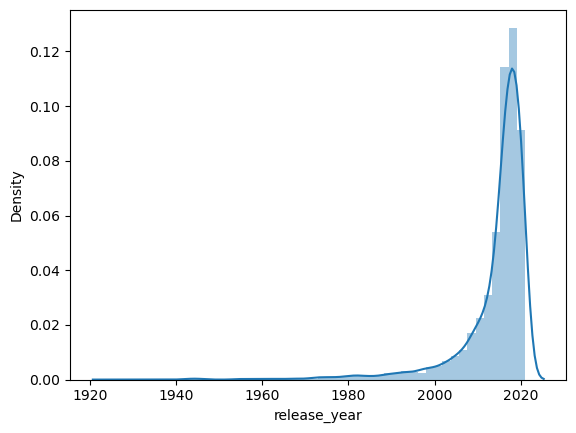

In [18]:
## To understand maximum no of movies released which year
sns.distplot(df["release_year"],kde = True)
plt.show()

In [19]:
## Identifying the rating values - As rating values is not clearly mentioned 
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
df["rating"].mode()


0    TV-MA
Name: rating, dtype: object

In [21]:
## Changing rating values into proper string to understand
ratings ={"PG-13":"Parental Guidance",
          "TV-MA" :"Mature Audience Only",
          "PG" :"Parental Guidance",
          "TV-14" : "Parental Guidance",
          "TV-Y":"Kids",
          "TV-Y7":"Older Children",
          "R":"Restricted",
          "TV-G":"General Audience",
          "G":"Kids",
          "NC-17":"Adults",
          "TV-Y7-FV":"Parental Guidance",
          "TV-PG":"Parental Guidance",
          "NR":"Adults",
          "UR" :"Adults",
          "NR" :"Adults"}
          
df["ratings"] = df["rating"].replace(ratings)

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ratings
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_details_NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Parental Guidance
1,s2,TV Show,Blood & Water,director_info_NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience Only
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience Only
3,s4,TV Show,Jailbirds New Orleans,director_info_NA,cast_details_NA,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience Only
4,s5,TV Show,Kota Factory,director_info_NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience Only


In [23]:
df["ratings"].unique()

array(['Parental Guidance', 'Mature Audience Only', 'Kids',
       'Older Children', 'Restricted', 'General Audience', 'Adults'],
      dtype=object)

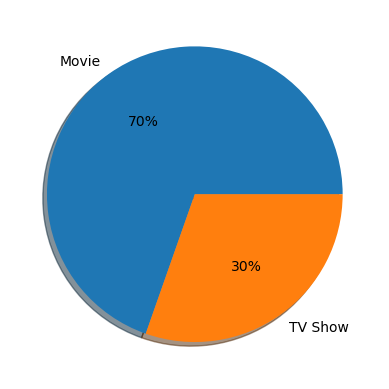

In [24]:
## Checcking types of movies & TV shows 
value_counts = df["type"].value_counts()
plt.pie(value_counts.values, labels=value_counts.index,autopct='%1.0f%%',shadow=True)
plt.show()

In [25]:
## From the above graph we can understand that 70% are movies and 30% are TV Shows

## Bivariates Analysis

In [26]:
## Now we have to check countries who produced higest number of movies & TV shows 

In [27]:
pd.crosstab(df["country"],["type"]).sort_values(by ="type" ,ascending = True)[-10:]

col_0,type
country,
Egypt,106
Mexico,110
France,124
Spain,145
Canada,181
South Korea,199
Japan,245
United Kingdom,419
India,972


In [28]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending= True)[-10:].reset_index()

In [29]:
countries

col_0,country,type
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,245
7,United Kingdom,419
8,India,972
9,United States,3649


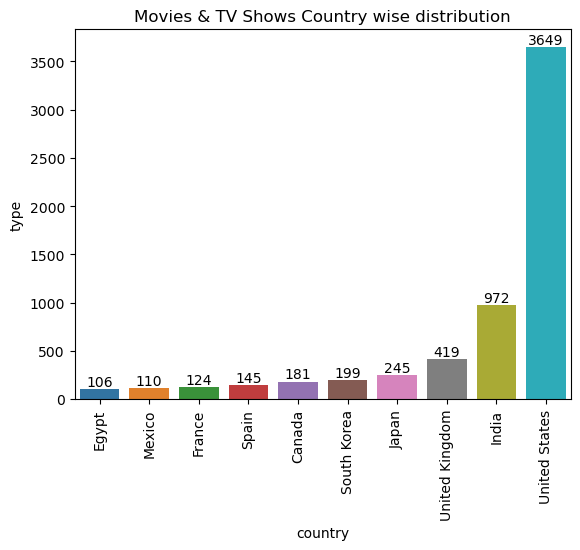

In [30]:
ax=sns.barplot(countries.country , countries.type)
plt.xticks(rotation=90)
plt.title("Movies & TV Shows Country wise distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [31]:
## Checking number of movies and TV shows produced 

In [32]:
value_counts = countries["type"].value_counts()

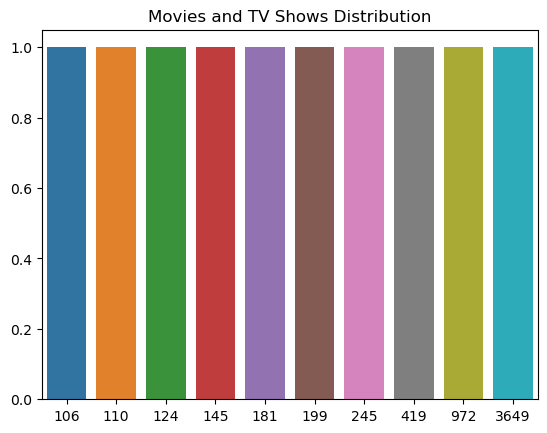

In [33]:
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("Movies and TV Shows Distribution")
plt.show()

In [34]:
## Checking number of movies produced according to countries 

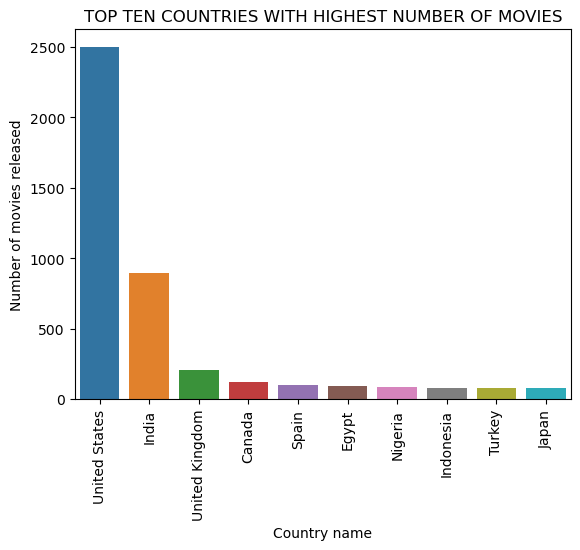

In [35]:
m=df[df["type"]=="Movie"]
movies=m["country"].value_counts().reset_index()[0:10]
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES")
sns.barplot(x=movies["index"],y=movies["country"])
plt.xlabel("Country name")
plt.ylabel("Number of movies released")
plt.xticks(rotation = 90)
plt.show()

In [36]:
## Checcking which country produced higest number of TV shows

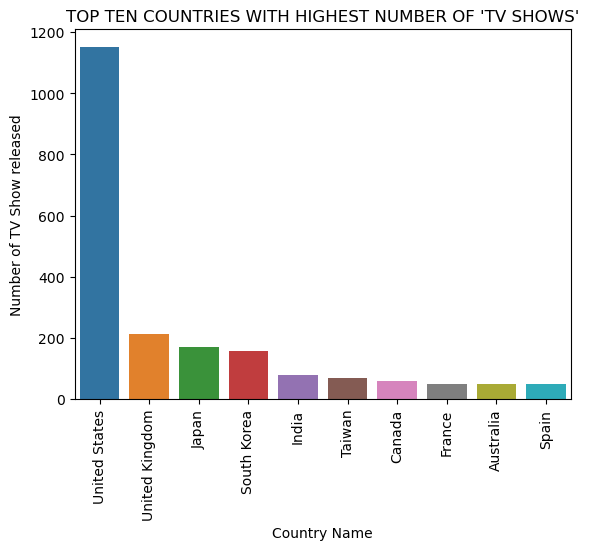

In [37]:
m=df[df["type"]=='TV Show']
movies=m["country"].value_counts().reset_index()[0:10]
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'")
sns.barplot(x=movies["index"],y=movies["country"])
plt.xlabel("Country Name")
plt.ylabel("Number of TV Show released")
plt.xticks(rotation = 90)
plt.show()

### From the above graphical presentation we have understood that US produced higest number of movies and TV Shows and overall netflix have a huge large amount of movies available as compare to TV Shows 

### US is the higest number of content producer on netflix

## Bivariate Analysis - Part 2 - Becasue "Need to sort out the content as per the country".

In [38]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ratings
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_details_NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Parental Guidance
1,s2,TV Show,Blood & Water,director_info_NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience Only
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience Only
3,s4,TV Show,Jailbirds New Orleans,director_info_NA,cast_details_NA,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience Only
4,s5,TV Show,Kota Factory,director_info_NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience Only


In [39]:
## Checking with how many movies and TV shows release as per years

In [40]:
bin_edges = range(1940, 2041, 10)

In [41]:
df['years'] = pd.cut(df['release_year'], bins=bin_edges, labels=bin_edges[:-1])

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ratings,years
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_details_NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Parental Guidance,2010
1,s2,TV Show,Blood & Water,director_info_NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience Only,2020
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience Only,2020
3,s4,TV Show,Jailbirds New Orleans,director_info_NA,cast_details_NA,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience Only,2020
4,s5,TV Show,Kota Factory,director_info_NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience Only,2020


In [43]:
## Content Created in a decade from 1930 to 2030

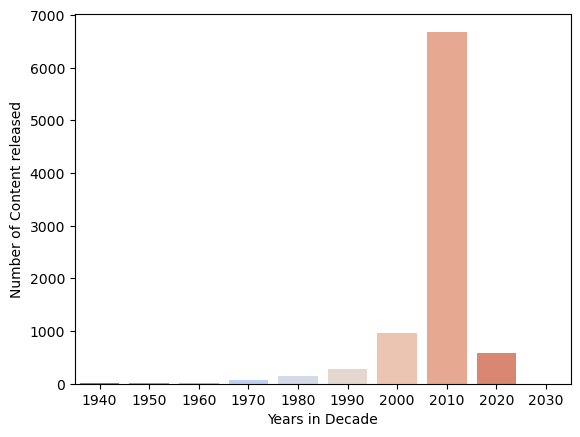

In [44]:
sns.countplot(df.years,palette ="coolwarm")
plt.xlabel("Years in Decade")
plt.ylabel("Number of Content released")
plt.show()

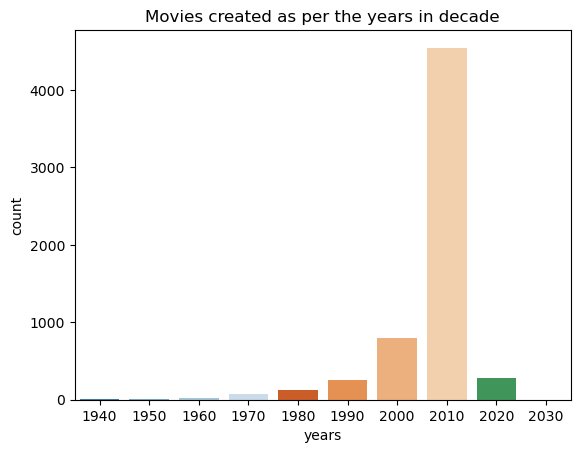

In [45]:
c=df[df["type"]=="Movie"]
sns.countplot(c["years"],palette="tab20c")
plt.title("Movies created as per the years in decade")
plt.show()

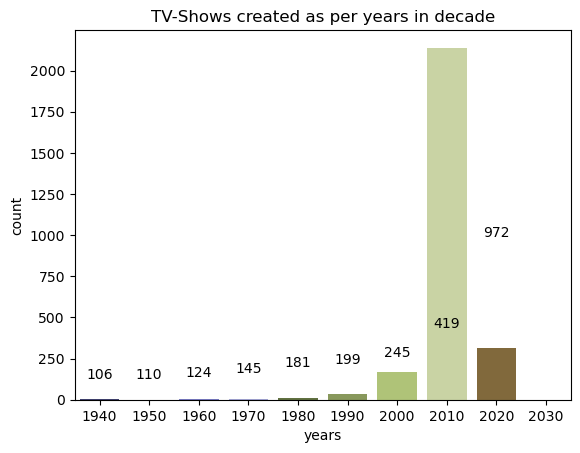

In [46]:
T=df[df["type"]=="TV Show"]
fx=sns.countplot(T["years"],palette="tab20b")
plt.title("TV-Shows created as per years in decade")
fx.bar_label(ax.containers[0], label_type='edge')
plt.show()

### From above graphical representation it shows that in 2010 decade most of the TV shows and movies were release

In [47]:
### Content Catagorization

In [48]:
df["ratings"].unique()

array(['Parental Guidance', 'Mature Audience Only', 'Kids',
       'Older Children', 'Restricted', 'General Audience', 'Adults'],
      dtype=object)

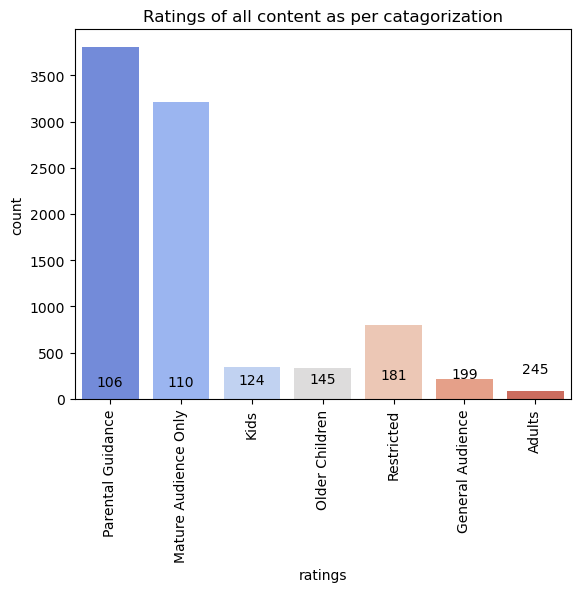

In [49]:
gx=sns.countplot(data=df, x='ratings',palette ="coolwarm")
plt.xticks(rotation=90)
plt.title("Ratings of all content as per catagorization")
gx.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [50]:
## Movies & TV Show Rating catagorization

In [51]:
movies=df[df["type"]=="Movie"]
tv=df[df["type"]=="TV Show"]

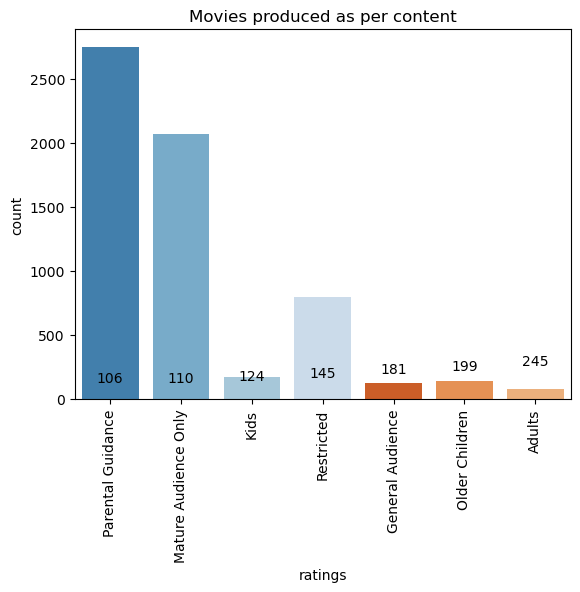

In [52]:
hx=sns.countplot(movies["ratings"],palette ="tab20c")
plt.title("Movies produced as per content")
ax.bar_label(ax.containers[0], label_type='edge')
hx.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=90)
plt.show()

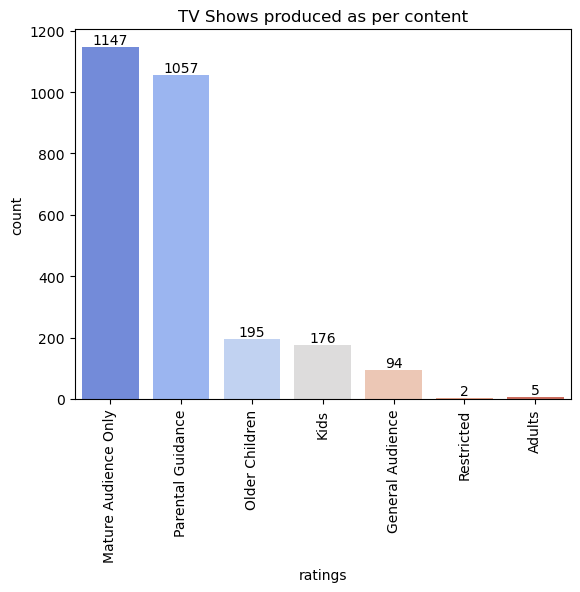

In [53]:
ax=sns.countplot(tv["ratings"],palette ="coolwarm")
plt.title("TV Shows produced as per content")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [54]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ratings,years
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_details_NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Parental Guidance,2010
1,s2,TV Show,Blood & Water,director_info_NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience Only,2020
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience Only,2020
3,s4,TV Show,Jailbirds New Orleans,director_info_NA,cast_details_NA,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience Only,2020
4,s5,TV Show,Kota Factory,director_info_NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience Only,2020


In [55]:
df1=df[["type","title","country","ratings","years"]]

In [56]:
df1.head()

,type,title,country,ratings,years
0,Movie,Dick Johnson Is Dead,United States,Parental Guidance,2010
1,TV Show,Blood & Water,South Africa,Mature Audience Only,2020
2,TV Show,Ganglands,United States,Mature Audience Only,2020
3,TV Show,Jailbirds New Orleans,United States,Mature Audience Only,2020
4,TV Show,Kota Factory,India,Mature Audience Only,2020
